In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import holidays
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Bidirectional
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('combined_data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(df.head())

                       Title Day  Hour  OccupancyPercent
0  9/11 Cafe & Concept Store  Su     6                 0
1  9/11 Cafe & Concept Store  Su     7                 0
2  9/11 Cafe & Concept Store  Su     8                 0
3  9/11 Cafe & Concept Store  Su     9                 9
4  9/11 Cafe & Concept Store  Su    10                20


In [ ]:
df.isnull().sum()

,0
Title,0
Day,0
Hour,0
OccupancyPercent,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23817 entries, 0 to 23816
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             23817 non-null  object
 1   Day               23817 non-null  object
 2   Hour              23817 non-null  int64 
 3   OccupancyPercent  23817 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 744.4+ KB


In [ ]:
unique_values = df['Title'].nunique()
print(unique_values)

181


In [ ]:
day_mapping = {'Mo': 0, 'Tu': 1, 'We': 2, 'Th': 3, 'Fr': 4, 'Sa': 5, 'Su': 6}
df['Day'] = df['Day'].map(day_mapping)
print(df.head(100))

                        Title  Day  Hour  OccupancyPercent
0   9/11 Cafe & Concept Store    6     6                 0
1   9/11 Cafe & Concept Store    6     7                 0
2   9/11 Cafe & Concept Store    6     8                 0
3   9/11 Cafe & Concept Store    6     9                 9
4   9/11 Cafe & Concept Store    6    10                20
..                        ...  ...   ...               ...
95  9/11 Cafe & Concept Store    4    11                45
96  9/11 Cafe & Concept Store    4    12                63
97  9/11 Cafe & Concept Store    4    13                80
98  9/11 Cafe & Concept Store    4    14                87
99  9/11 Cafe & Concept Store    4    15                82

[100 rows x 4 columns]


In [ ]:
title_mapping = {title: idx for idx, title in enumerate(sorted(df['Title'].unique()))}
df['Title'] = df['Title'].map(title_mapping)

In [ ]:
target_scaler = MinMaxScaler(feature_range=(0, 1))
df['OccupancyPercent'] = target_scaler.fit_transform(df[['OccupancyPercent']])

In [ ]:
start_date = pd.Timestamp("2024-01-01")
df['Date'] = start_date + pd.to_timedelta(df['Day'], unit='D')
df['Timestamp'] = pd.to_datetime(df['Date']) + pd.to_timedelta(df['Hour'], unit='h')
df.set_index('Timestamp', inplace=True)

,Title,Day,Hour,OccupancyPercent,Date
0,0,6,6,0.00,2024-01-07
1,0,6,7,0.00,2024-01-07
2,0,6,8,0.00,2024-01-07
3,0,6,9,0.09,2024-01-07
4,0,6,10,0.20,2024-01-07
5,0,6,11,0.32,2024-01-07
6,0,6,12,0.50,2024-01-07
7,0,6,13,0.60,2024-01-07
8,0,6,14,0.65,2024-01-07
9,0,6,15,0.64,2024-01-07


In [ ]:
print(df.head())
print(df.info())


                     Title  Day  Hour  OccupancyPercent       Date
Timestamp                                                         
2024-01-07 06:00:00      0    6     6              0.00 2024-01-07
2024-01-07 07:00:00      0    6     7              0.00 2024-01-07
2024-01-07 08:00:00      0    6     8              0.00 2024-01-07
2024-01-07 09:00:00      0    6     9              0.09 2024-01-07
2024-01-07 10:00:00      0    6    10              0.20 2024-01-07
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23817 entries, 2024-01-07 06:00:00 to 2024-01-06 23:00:00
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Title             23817 non-null  int64         
 1   Day               23817 non-null  int64         
 2   Hour              23817 non-null  int64         
 3   OccupancyPercent  23817 non-null  float64       
 4   Date              23817 non-null  datetime64[ns]
dtypes: da

In [ ]:
df = df.sort_index()
df

In [ ]:
df_filtered = df.loc['2024-01-01':'2024-01-07']
print(df_filtered.head(100))

                     Title  Day  Hour  OccupancyPercent       Date
Timestamp                                                         
2024-01-01 00:00:00     47    0     0              0.29 2024-01-01
2024-01-01 00:00:00    118    0     0              0.03 2024-01-01
2024-01-01 00:00:00    114    0     0              0.26 2024-01-01
2024-01-01 00:00:00    121    0     0              0.14 2024-01-01
2024-01-01 00:00:00    175    0     0              0.16 2024-01-01
...                    ...  ...   ...               ...        ...
2024-01-01 03:00:00     46    0     3              0.05 2024-01-01
2024-01-01 03:00:00     47    0     3              0.17 2024-01-01
2024-01-01 03:00:00     35    0     3              0.00 2024-01-01
2024-01-01 03:00:00    123    0     3              0.12 2024-01-01
2024-01-01 03:00:00     86    0     3              0.16 2024-01-01

[100 rows x 5 columns]


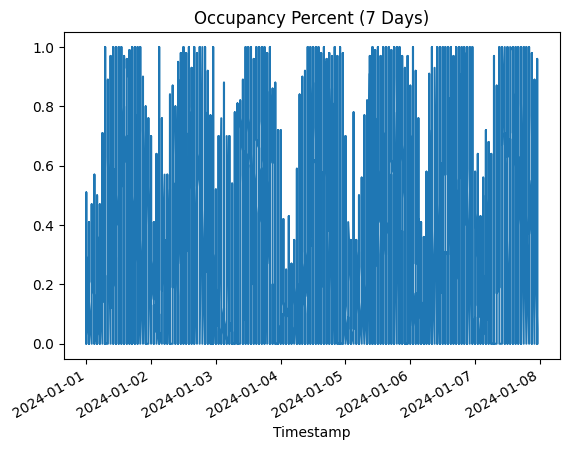

<ipython-input-19-12e6c5195780>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df_filtered['OccupancyPercent'].resample('6H').mean()


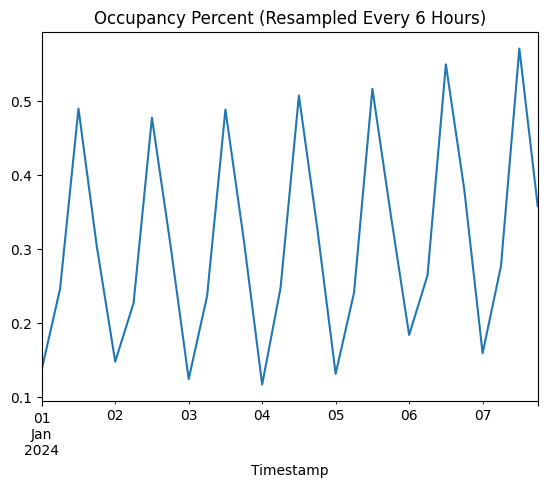

In [ ]:
df_filtered['OccupancyPercent'].plot(title="Occupancy Percent (7 Days)")
plt.show()

df_resampled = df_filtered['OccupancyPercent'].resample('6H').mean()
df_resampled.plot(title="Occupancy Percent (Resampled Every 6 Hours)")
plt.show()

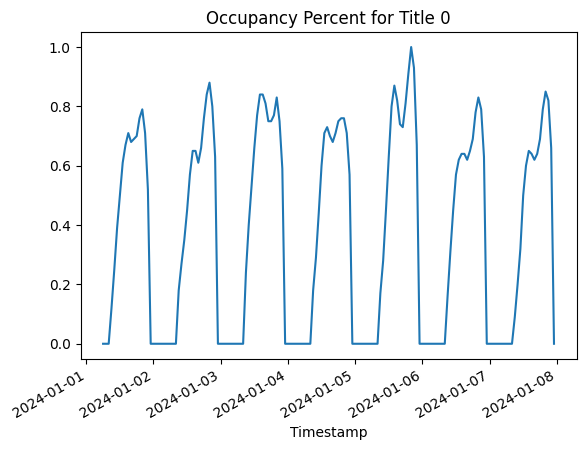

In [ ]:
tempat_0 = df[df['Title'] == 0]
tempat_0['OccupancyPercent'].plot(title="Occupancy Percent for Title 0")
plt.show()

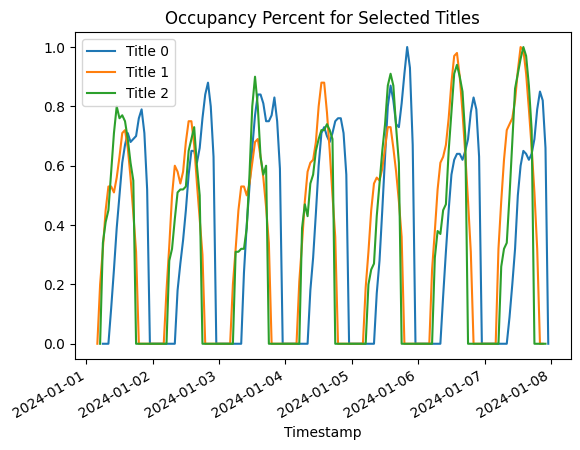

In [ ]:
tempat_012 = df[df['Title'].isin([0, 1, 2])]
for title, group in tempat_012.groupby('Title'):
    group['OccupancyPercent'].plot(label=f'Title {title}')

plt.legend()
plt.title("Occupancy Percent for Selected Titles")
plt.show()

In [ ]:
tempat_0_hourly = tempat_0['OccupancyPercent'].resample('1H').mean()

<ipython-input-22-3c3fe3c4e049>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tempat_0_hourly = tempat_0['OccupancyPercent'].resample('1H').mean()


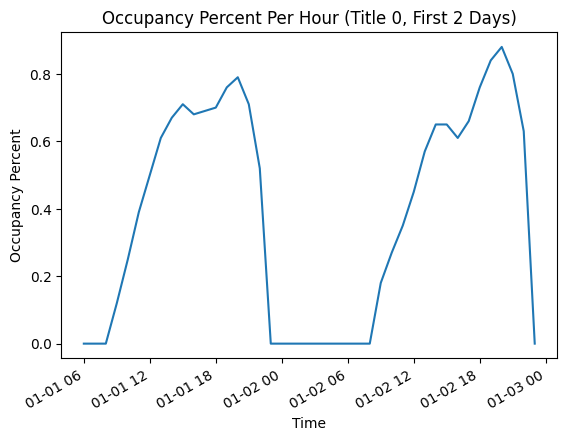

In [ ]:
tempat_0_subset = tempat_0.loc['2024-01-01':'2024-01-02']
tempat_0_subset['OccupancyPercent'].plot(title="Occupancy Percent Per Hour (Title 0, First 2 Days)")
plt.xlabel("Time")
plt.ylabel("Occupancy Percent")
plt.show()

In [ ]:
import holidays

indonesia_holidays = holidays.Indonesia(years=[2024])
df['Holiday'] = df.index.to_series().apply(lambda x: x in indonesia_holidays)

In [ ]:
print(df[['Holiday', 'OccupancyPercent']].head(10))
print(df[df['Holiday']])

            Holiday  OccupancyPercent
Timestamp                            
2024-01-01     True              0.29
2024-01-01     True              0.03
2024-01-01     True              0.26
2024-01-01     True              0.14
2024-01-01     True              0.16
2024-01-01     True              0.26
2024-01-01     True              0.51
2024-01-01     True              0.51
2024-01-01     True              0.35
2024-01-01     True              0.05
                     Title  Day  Hour  OccupancyPercent       Date  Holiday
Timestamp                                                                  
2024-01-01 00:00:00     47    0     0              0.29 2024-01-01     True
2024-01-01 00:00:00    118    0     0              0.03 2024-01-01     True
2024-01-01 00:00:00    114    0     0              0.26 2024-01-01     True
2024-01-01 00:00:00    121    0     0              0.14 2024-01-01     True
2024-01-01 00:00:00    175    0     0              0.16 2024-01-01     True
...         

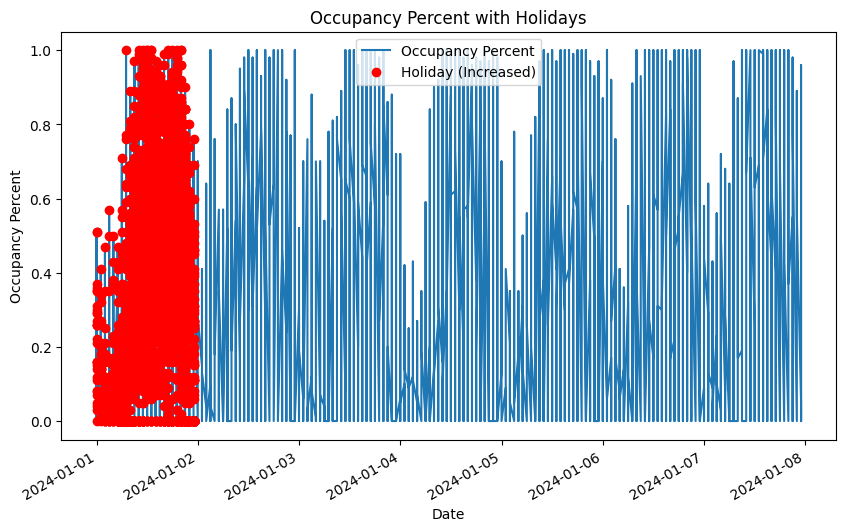

In [ ]:
plt.figure(figsize=(10, 6))
df['OccupancyPercent'].plot(label="Occupancy Percent")
holiday_data = df[df['Holiday']]
plt.scatter(holiday_data.index, holiday_data['OccupancyPercent'], color='red', label='Holiday (Increased)', zorder=5)

plt.title("Occupancy Percent with Holidays")
plt.xlabel("Date")
plt.ylabel("Occupancy Percent")
plt.legend()
plt.show()

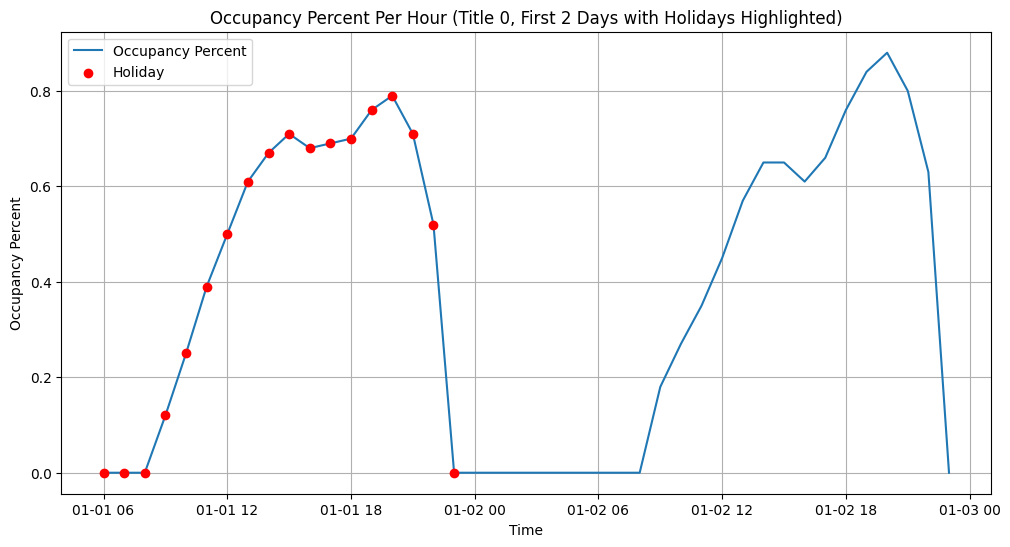

In [ ]:
tempat_0 = df[df['Title'] == 0]
tempat_0_subset = tempat_0.loc['2024-01-01':'2024-01-02']

plt.figure(figsize=(12, 6))
plt.plot(tempat_0_subset.index, tempat_0_subset['OccupancyPercent'], label="Occupancy Percent")

holidays_subset = tempat_0_subset[tempat_0_subset['Holiday']]
plt.scatter(
    holidays_subset.index,
    holidays_subset['OccupancyPercent'],
    color='red',
    label="Holiday",
    zorder=5
)

plt.title("Occupancy Percent Per Hour (Title 0, First 2 Days with Holidays Highlighted)")
plt.xlabel("Time")
plt.ylabel("Occupancy Percent")
plt.legend()
plt.grid()
plt.show()

In [ ]:
df['Weekend'] = df.index.to_series().dt.dayofweek.isin([5, 6])
df['Holiday'] = df['Holiday'] | df['Weekend']

In [ ]:

df.loc[df['Holiday'] & ~df['Weekend'], 'OccupancyPercent'] *= 1.15
df.loc[df['Weekend'], 'OccupancyPercent'] *= 1.10

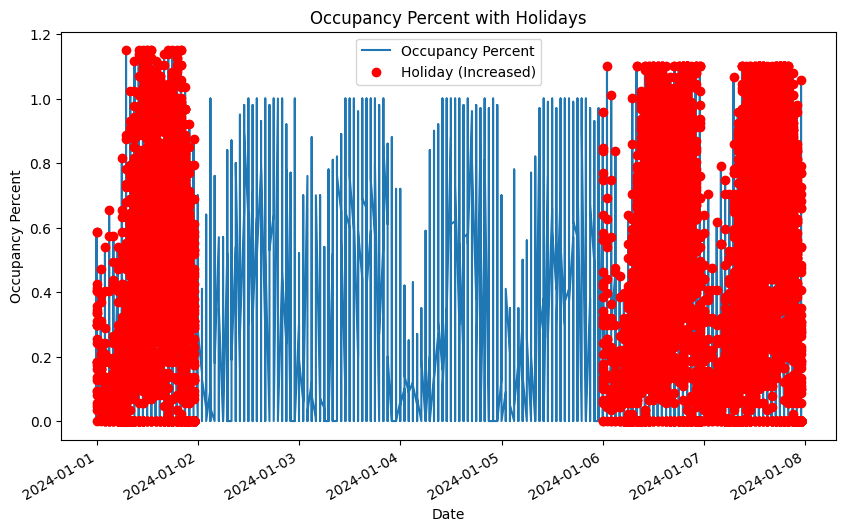

In [ ]:
plt.figure(figsize=(10, 6))
df['OccupancyPercent'].plot(label="Occupancy Percent")
holiday_data = df[df['Holiday']]
plt.scatter(holiday_data.index, holiday_data['OccupancyPercent'], color='red', label='Holiday (Increased)', zorder=5)

plt.title("Occupancy Percent with Holidays")
plt.xlabel("Date")
plt.ylabel("Occupancy Percent")
plt.legend()
plt.show()

In [ ]:
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
df['DayOfWeek_sin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['DayOfWeek_cos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)

In [ ]:
df[['Day','Date', 'Hour', 'Holiday', 'Weekend','OccupancyPercent', 'Title']].corr()

,Day,Date,Hour,Holiday,Weekend,OccupancyPercent,Title
Day,1.000000,1.000000,0.001090,0.284292,0.789027,0.076938,0.000896
Date,1.000000,1.000000,0.001090,0.284292,0.789027,0.076938,0.000896
Hour,0.001090,0.001090,1.000000,0.000348,0.001149,0.164758,-0.003923
Holiday,0.284292,0.284292,0.000348,1.000000,0.728566,0.111083,0.000461
Weekend,0.789027,0.789027,0.001149,0.728566,1.000000,0.108344,0.000539
OccupancyPercent,0.076938,0.076938,0.164758,0.111083,0.108344,1.000000,0.012661
Title,0.000896,0.000896,-0.003923,0.000461,0.000539,0.012661,1.000000


In [ ]:
df

,Title,Day,Hour,OccupancyPercent,Date,Holiday,Weekend,DayOfWeek,Month,Hour_sin,Hour_cos,DayOfWeek_sin,DayOfWeek_cos
Timestamp,,,,,,,,,,,,,
2024-01-01 00:00:00,47,0,0,0.3335,2024-01-01,True,False,0,1,0.000000,1.000000,0.000000,1.00000
2024-01-01 00:00:00,118,0,0,0.0345,2024-01-01,True,False,0,1,0.000000,1.000000,0.000000,1.00000
2024-01-01 00:00:00,114,0,0,0.2990,2024-01-01,True,False,0,1,0.000000,1.000000,0.000000,1.00000
2024-01-01 00:00:00,121,0,0,0.1610,2024-01-01,True,False,0,1,0.000000,1.000000,0.000000,1.00000
2024-01-01 00:00:00,175,0,0,0.1840,2024-01-01,True,False,0,1,0.000000,1.000000,0.000000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-07 23:00:00,167,6,23,0.0000,2024-01-07,True,True,6,1,-0.258819,0.965926,-0.781831,0.62349
2024-01-07 23:00:00,10,6,23,0.0000,2024-01-07,True,True,6,1,-0.258819,0.965926,-0.781831,0.62349
2024-01-07 23:00:00,81,6,23,0.0000,2024-01-07,True,True,6,1,-0.258819,0.965926,-0.781831,0.62349


In [ ]:
features = ['OccupancyPercent','Hour_sin', 'Hour_cos',
            'DayOfWeek_sin', 'DayOfWeek_cos', 'Holiday', 'Weekend', 'Month', 'Title']

scaler = MinMaxScaler(feature_range=(0, 1))
df[features[1:]] = scaler.fit_transform(df[features[1:]])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

def create_dataset(X, y, time_step=24):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

In [ ]:
def train_model(df, features):

    X = df[features].values
    y = df['OccupancyPercent'].values

    time_step = 24
    X, y = create_dataset(X, y, time_step=time_step)

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model_cnn = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        LSTM(128, return_sequences=False),
        Dropout(0.2),
        Dense(1)
    ])

    model_cnn.compile(optimizer='adam', loss='mse')
    model_cnn.fit(X_train, y_train, epochs=40, batch_size=16, validation_data=(X_test, y_test))

    return model_cnn, X_test, y_test

In [ ]:
features = ['OccupancyPercent', 'Hour_sin', 'Hour_cos', 'DayOfWeek_sin', 'DayOfWeek_cos', 'Holiday', 'Weekend', 'Month']

print("Training model for all titles...")
model_cnn, X_test, y_test = train_model(df, features)
print("Training completed.")

Training model for all titles...
Starting training for title...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0690 - val_loss: 0.0994
Epoch 2/40
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 0.0646 - val_loss: 0.1078
Epoch 3/40
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0650 - val_loss: 0.1021
Epoch 4/40
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.0642 - val_loss: 0.1052
Epoch 5/40
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0655 - val_loss: 0.1026
Epoch 6/40
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 0.0652 - val_loss: 0.1024
Epoch 7/40
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0641 - val_loss: 0.1018
Epoch 8/40
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 0.0644 - val_loss: 0.1024
Epoch 9/40
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0636 - val_loss: 0.1059
Epoch 10/40
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.0640 - val_loss: 0.1030
Epoch 11/40
1190/1190 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 0.0643 - val_loss: 0.1028
Epoch 12/

149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


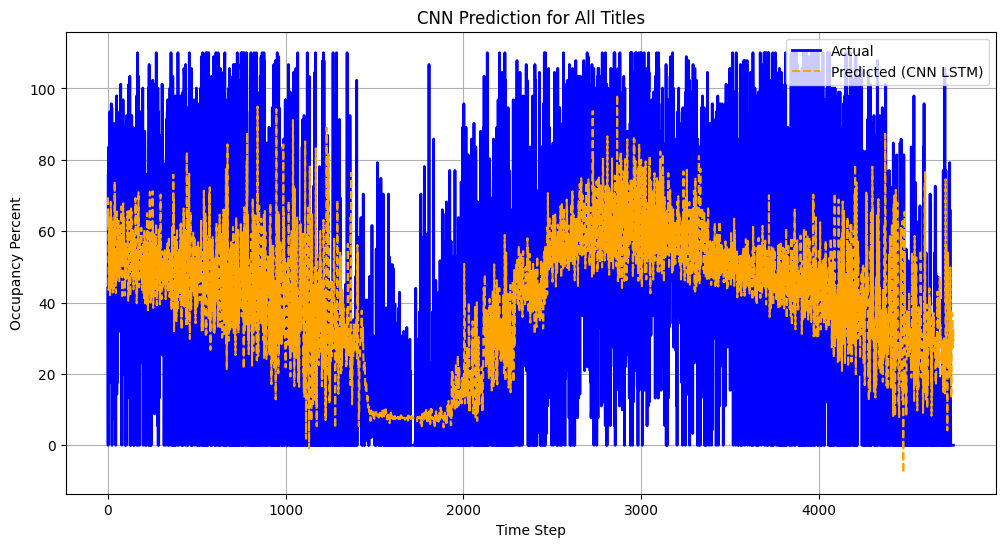

In [ ]:
y_pred_cnn = model_cnn.predict(X_test)

y_test_rescaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_cnn_rescaled = target_scaler.inverse_transform(y_pred_cnn)

plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual', color='blue', linewidth=2)
plt.plot(y_pred_cnn_rescaled, label='Predicted (CNN LSTM)', color='orange', linestyle='dashed')
plt.title("CNN Prediction for All Titles")
plt.xlabel("Time Step")
plt.ylabel("Occupancy Percent")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

all_mae_cnn = []

cnn_preds = model_cnn.predict(X_test)
mse_cnn = mean_squared_error(y_test, cnn_preds)
mae_cnn = mean_absolute_error(y_test, cnn_preds)

149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


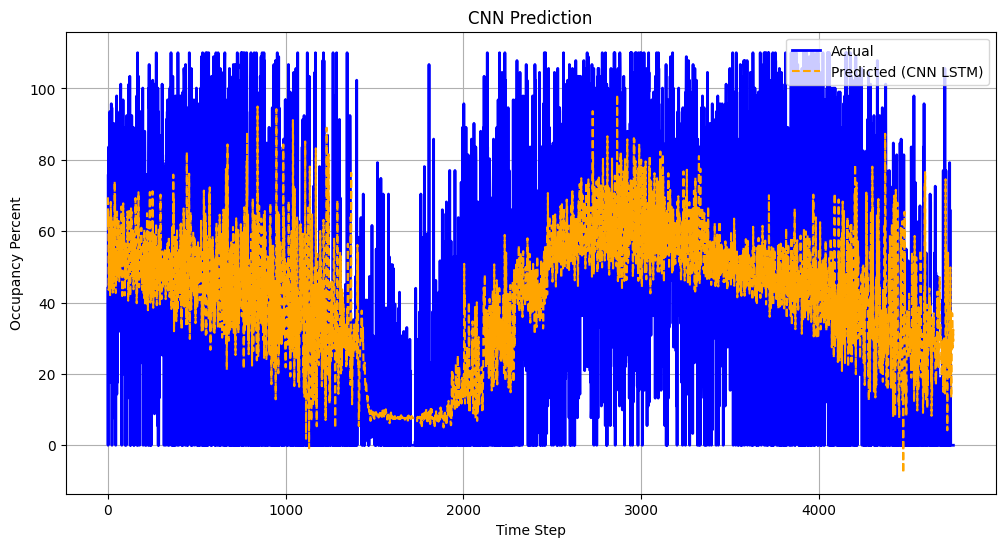

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(y_test_rescaled, label='Actual', color='blue', linewidth=2)
plt.plot(y_pred_cnn_rescaled, label='Predicted (CNN LSTM)', color='orange', linestyle='dashed')
plt.title(f"CNN LSTM Prediction")
plt.xlabel("Time Step")
plt.ylabel("Occupancy Percent")
plt.legend()
plt.grid()
plt.show()